In [11]:
# from qiskit import QuantumCircuit
import qiskit
from qiskit_aer import AerSimulator
simulator = AerSimulator()

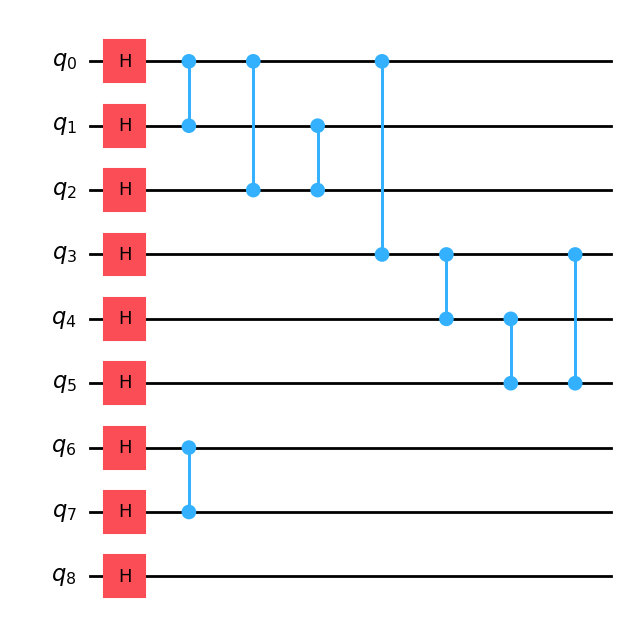

In [12]:
n = 9
edges = [[0,1],[0,2],[1,2],[0,3],[3,4],[4,5],[3,5],[6,7]]
circ = qiskit.QuantumCircuit(n)
for i in range(n):
    circ.h(i)
for edge in edges:
    circ.cz(edge[0],edge[1])
circ.draw("mpl",style="iqp")

In [14]:
# THIS TELLS US THAT THERE IS A TEST FOR GRAPH-STATE:
#  if applying a hadamard to a qbit 

numShots = 1024*4

for i in range(n):
    circ = qiskit.QuantumCircuit(n)
    for i in range(n):
        circ.h(i)
    for edge in edges:
        circ.cz(edge[0],edge[1])
    circ.h(i)
    circ.measure_all()
    circ = qiskit.transpile(circ,simulator)
    result = simulator.run(circ,shots=numShots).result()
    counts = result.get_counts(circ)
    print("output states with nonzero probability is at least: ", len(counts))
# qiskit.visualization.plot_histogram(counts_ideal)

output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
output states with nonzero probability is at least:  256
